# **GPT1 (Generative Pre-Training of a Language Model)**

Improving Language Understanding by Generative Pre-Training

https://openai.com/research/language-unsupervised

https://www.cs.ubc.ca/~amuham01/LING530/papers/radford2018improving.pdf


대량의 학습 데이터 셋을 구하기 힘듦

비지도 학습과 지도 학습을 섞어서 학습하는 방법을 제시


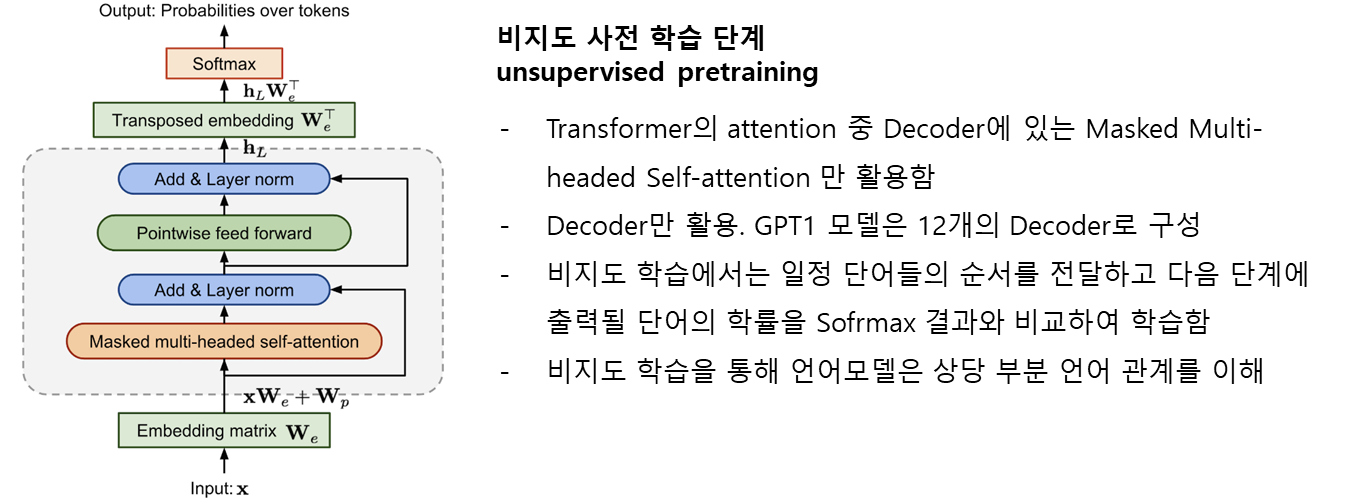

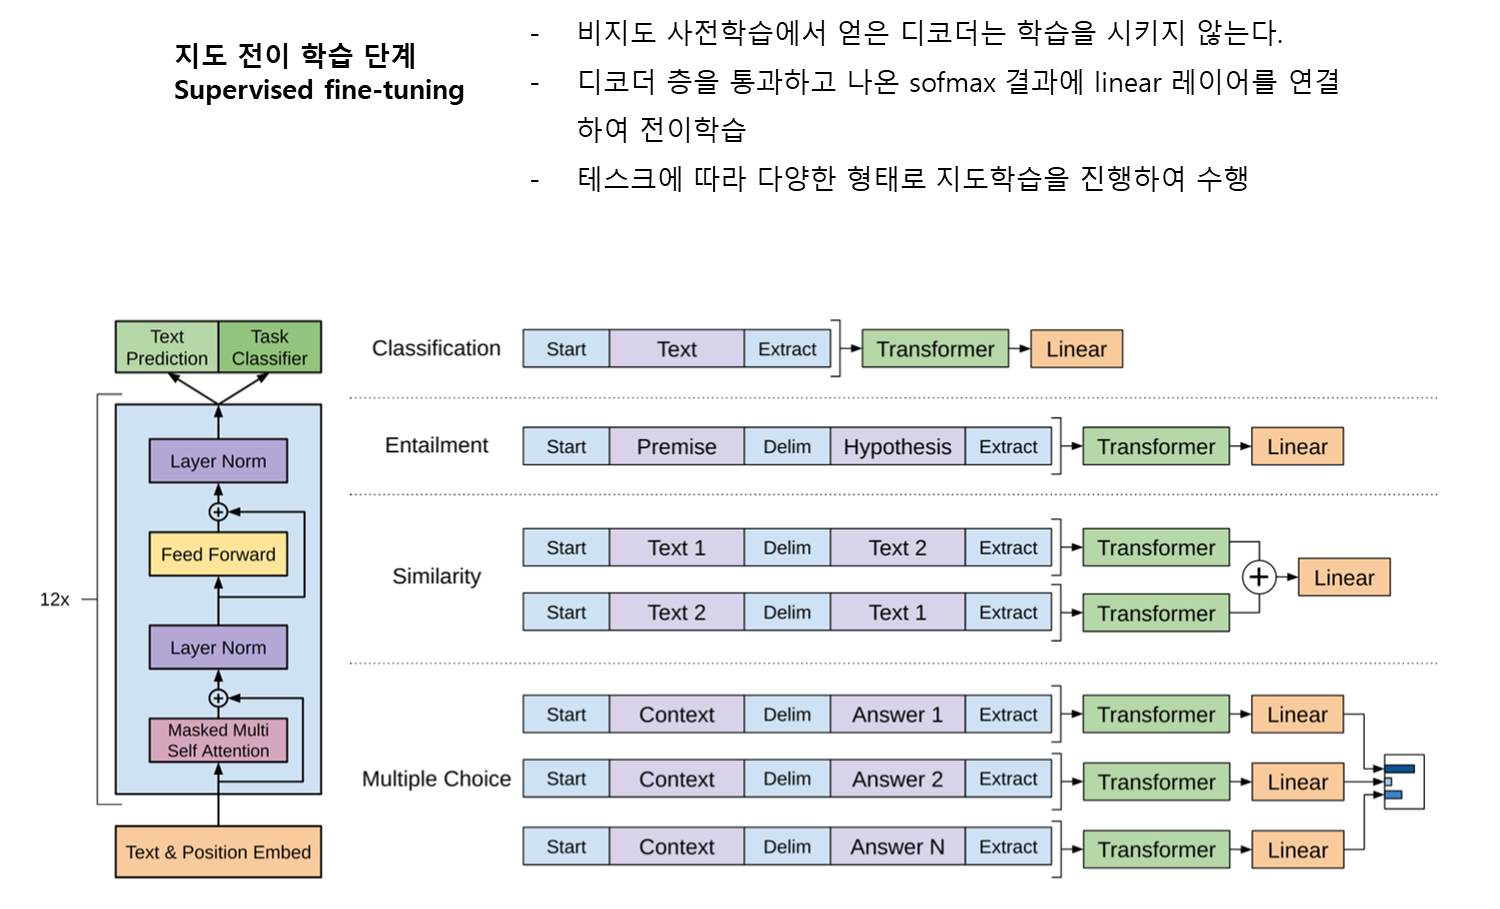

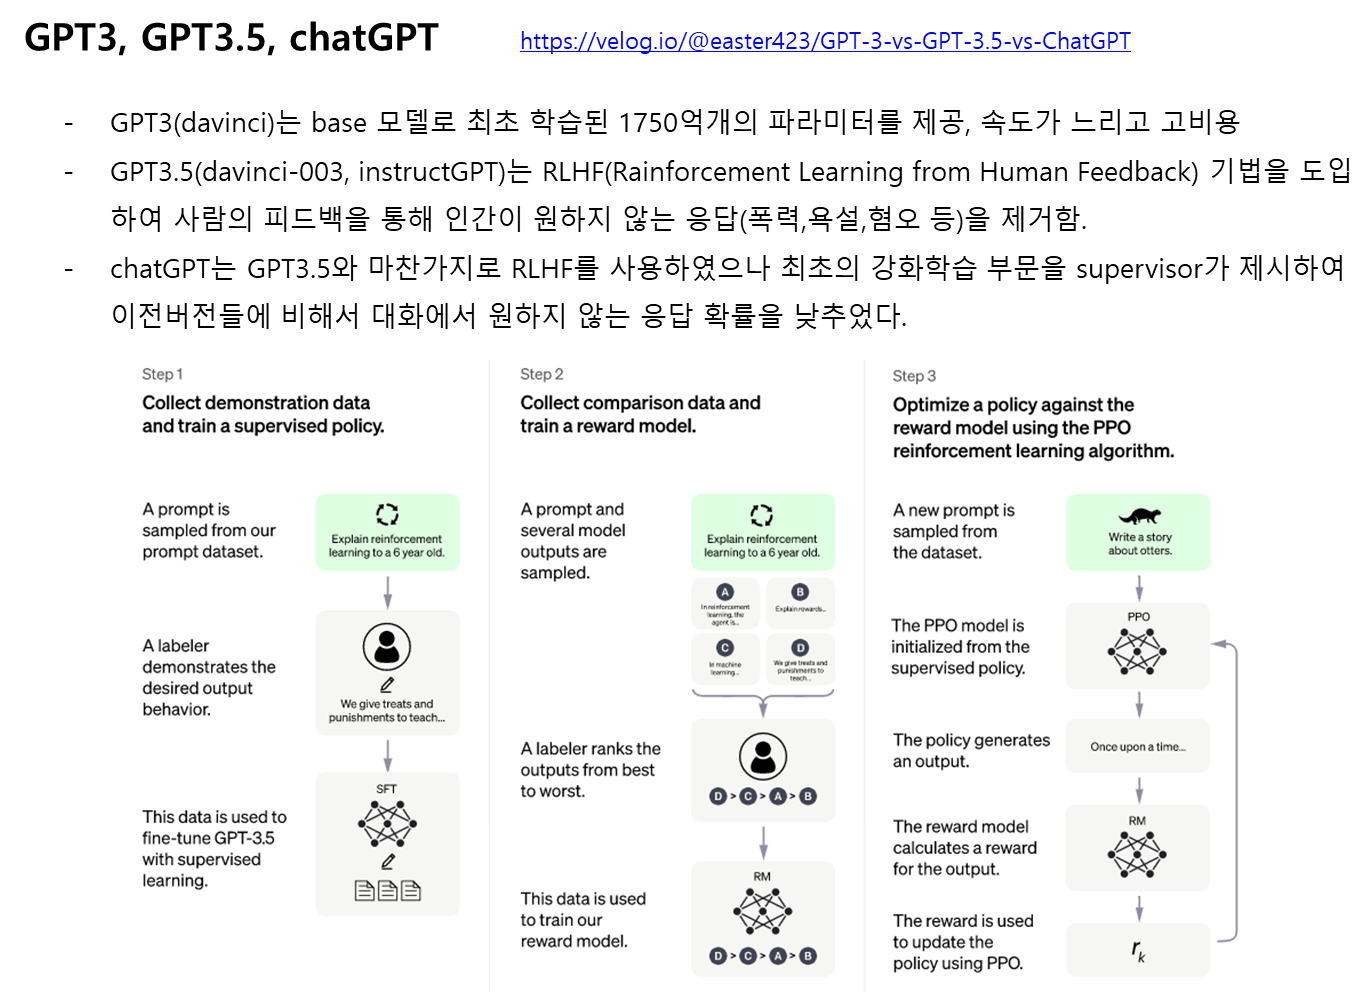

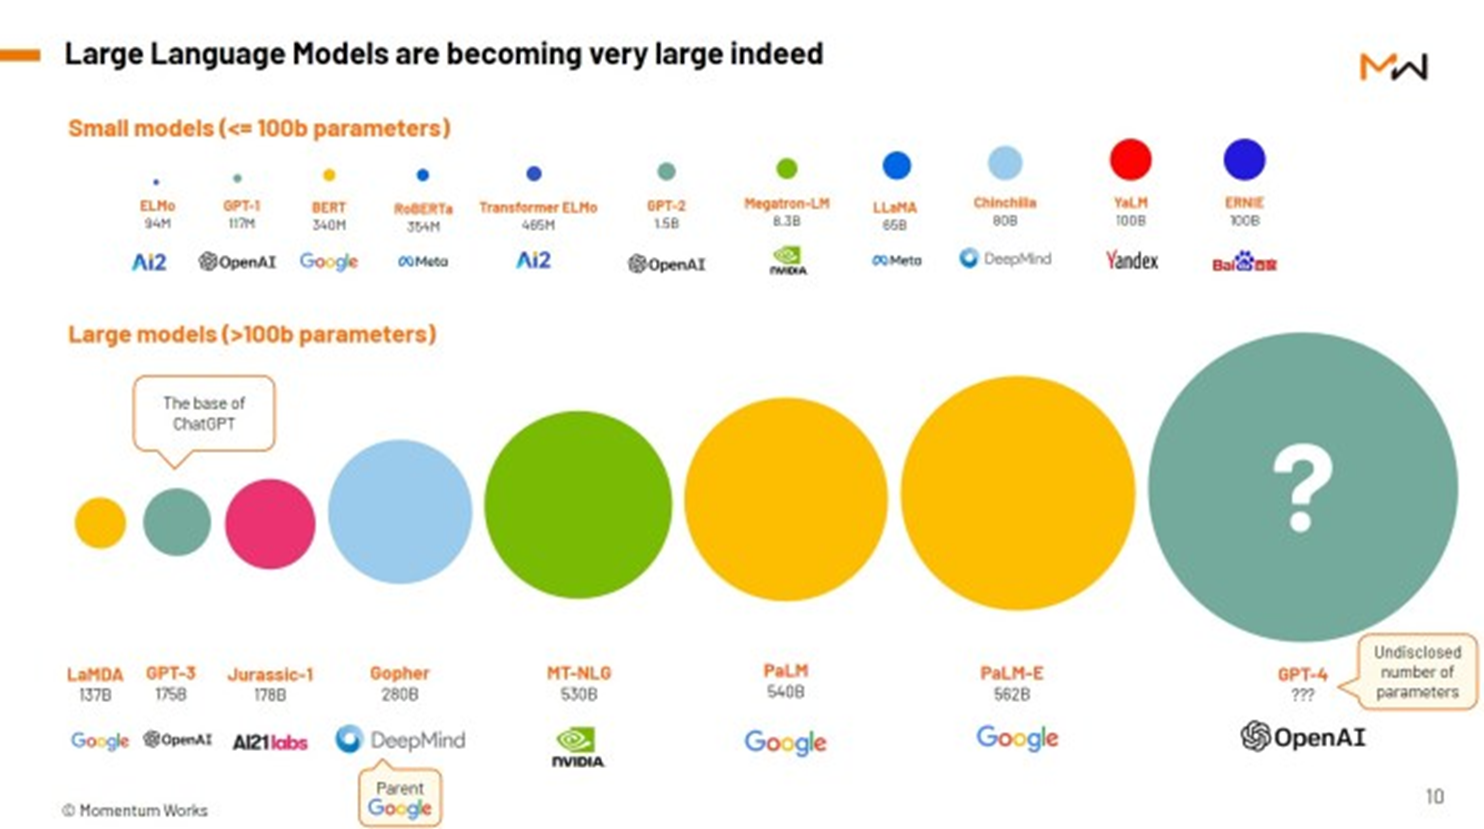

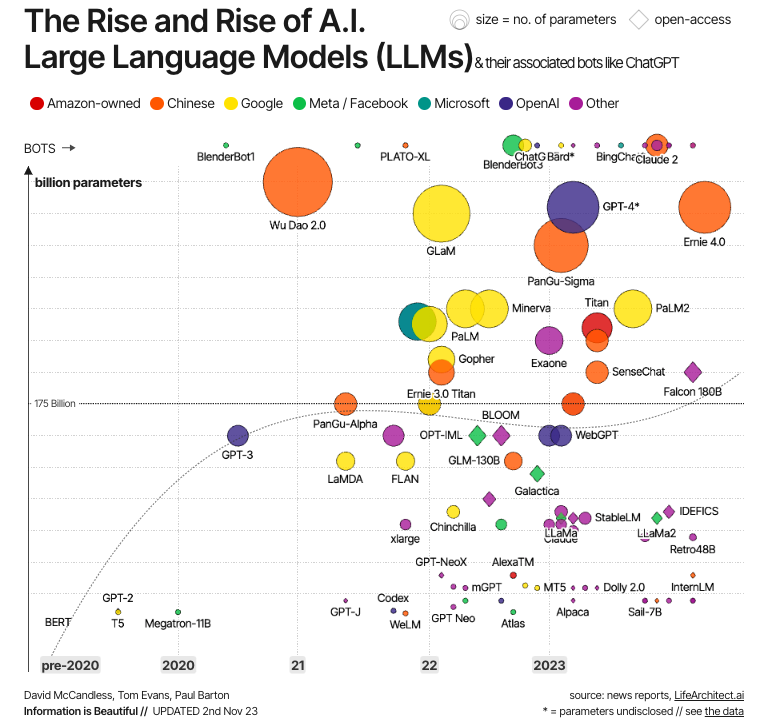

# **ChatML (Markup Language)**

https://cobusgreyling.medium.com/the-introduction-of-chat-markup-language-chatml-is-important-for-a-number-of-reasons-5061f6fe2a85


ChatGPT에 채팅 내용을 전달하기 위해 만들어진 구조체

role과 content 키값으로 이루어즌 딕셔너리 리스트를 전달

Role은 system, assistant, user 로 구분하며, system을 이용하여 챗봇을 내가 원하는 방식으로 설정 가능



In [ ]:
pip install openai

In [ ]:
import os
from openai import OpenAI

# API 키 설정
os.environ['OPENAI_API_KEY'] = '[YOUR_API_KEY]'



client = OpenAI(api_key=os.environ['OPENAI_API_KEY'])

def chatGPT(msgs, temp=0.8, maxtoken=4096):
    response = client.chat.completions.create(
        model='gpt-3.5-turbo-16k',
        messages=msgs,
        temperature=temp,
        max_tokens=maxtoken
    )
    return response


In [ ]:

response = chatGPT([{"role":"user", "content":"안녕"}])
print(response.choices[0].message.content)

# **Tempertature**

# **hallucination**

In [ ]:

response = chatGPT([{"role":"user", "content":"반가워 너는 누구니?"}], temp=1)
print(response.choices[0].message.content)


In [ ]:

response = chatGPT([{"role":"user", "content":"반가워 너는 누구니?"}], temp=0)
print(response.choices[0].message.content)


# **System Prompt**

In [ ]:
msg = [
    {"role":"system", "content":"정중한 말투로 답변한다"},
    {"role":"user", "content":"반가워 너는 누구니?"}
    ]

response = chatGPT(msg)
print(response.choices[0].message.content)


In [ ]:
msg = [
    {"role":"system", "content":"친근한 말투로 답변해줘"},
    {"role":"user", "content":"반가워 너는 누구니?"}
    ]

response = chatGPT(msg)
print(response.choices[0].message.content)


In [ ]:
msg = [
    {"role":"system", "content":"너는 매우 반항적인 사춘기 인생을 사는 중학생이고, 시크하고 무심하며 싸가지 없게 대답하기로 유명하지"},
    {"role":"user", "content":"반가워 너는 누구니?"}
    ]

response = chatGPT(msg)
print(response.choices[0].message.content)


In [ ]:

# 대화 내용을 저장할 리스트
conversation_history = []

def chat_with_history(user_input):
    conversation_history.append({"role": "user", "content": user_input})
    response = chatGPT(conversation_history)
    bot_reply = response.choices[0].message.content
    conversation_history.append({"role": "assistant", "content": bot_reply})
    return bot_reply

# 초기 시스템 메시지 설정 (선택 사항)
system_message = {"role": "system", "content": "너는 매우 반항적인 사춘기 인생을 사는 중학생이고, 시크하고 무심하며 싸가지 없게 대답하기로 유명하지"}
conversation_history.append(system_message)


# 대화 시작
while True:
    user_input = input("You: ")
    if user_input.lower() == "q":
        break

    bot_reply = chat_with_history(user_input)
    print("Bot:", bot_reply)